In [1]:
import numpy as np
import pandas as pd


In [2]:
import os
for dirname,_,filenames in os.walk(r"https://1drv.ms/f/c/0a87b8e08b03e3e3/Eo91LQiwUmtBhVv9tsj3k9IBCR9poDrPvimM1m18TJ3ZbQ?e=HTaqac"):
    for filename in filenames:
        print(os.path.join(dirname,filename))


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

DATA READING

In [6]:
train=pd.read_csv(r"C:\Users\palis\OneDrive\Desktop\House Price Prediction\dataset\train.csv")
test=pd.read_csv(r"C:\Users\palis\OneDrive\Desktop\House Price Prediction\dataset\test.csv")

DATA EXPLORATION

In [7]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [8]:
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [11]:
train.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [12]:
test.describe()

,beds,baths,size,lot_size,zip_code,price
count,505.000000,505.000000,505.000000,428.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,3994.459813,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,2696.962024,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,0.230000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,1326.500000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,4190.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,6000.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,9974.000000,98199.000000,6.250000e+06


DATA CLEANING

In [13]:
train['lot_size_units'].unique()

array(['sqft', 'acre', nan], dtype=object)

In [14]:
test['lot_size_units'].unique()

array(['sqft', 'acre', nan], dtype=object)

In [15]:
train['size_units'].unique()

array(['sqft'], dtype=object)

In [16]:
test['size_units'].unique()

array(['sqft'], dtype=object)

In [17]:
acre_to_sqft = 43560
acre_mask = train['lot_size_units'] == 'acre'
train.loc[acre_mask, 'lot_size'] *= acre_to_sqft
train.loc[acre_mask, 'lot_size_units'] = 'sqft'

In [18]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [19]:
acre_to_sqft = 43560
acre_mask = test['lot_size_units'] == 'acre'
test.loc[acre_mask, 'lot_size'] *= acre_to_sqft
test.loc[acre_mask, 'lot_size_units'] = 'sqft'

In [20]:
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0


In [21]:
train=train.drop('lot_size_units',axis=1)
train=train.drop('size_units',axis=1)

In [22]:
train.head()

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.0,98144,795000.0
1,4,2.0,2240.0,13503.6,98106,915000.0
2,4,3.0,2040.0,3783.0,98107,950000.0
3,4,3.0,3800.0,5175.0,98199,1950000.0
4,2,2.0,1042.0,NaN,98102,950000.0


In [23]:
test=test.drop('lot_size_units',axis=1)
test=test.drop('size_units',axis=1)

In [24]:
test.head()

,beds,baths,size,lot_size,zip_code,price
0,3,3.0,2850.0,4200.0,98119,1175000.0
1,4,5.0,3040.0,5002.0,98106,1057500.0
2,3,1.0,1290.0,6048.0,98125,799000.0
3,3,2.0,2360.0,12196.8,98188,565000.0
4,3,3.5,1942.0,1603.0,98107,1187000.0


In [25]:
train['lot_size'] = train['lot_size'].fillna(train['lot_size'].median())

In [26]:
test['lot_size'] = test['lot_size'].fillna(test['lot_size'].median())

DATA VISUALISATION

HIST PLOT

D:\Users\palis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\palis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\palis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\palis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

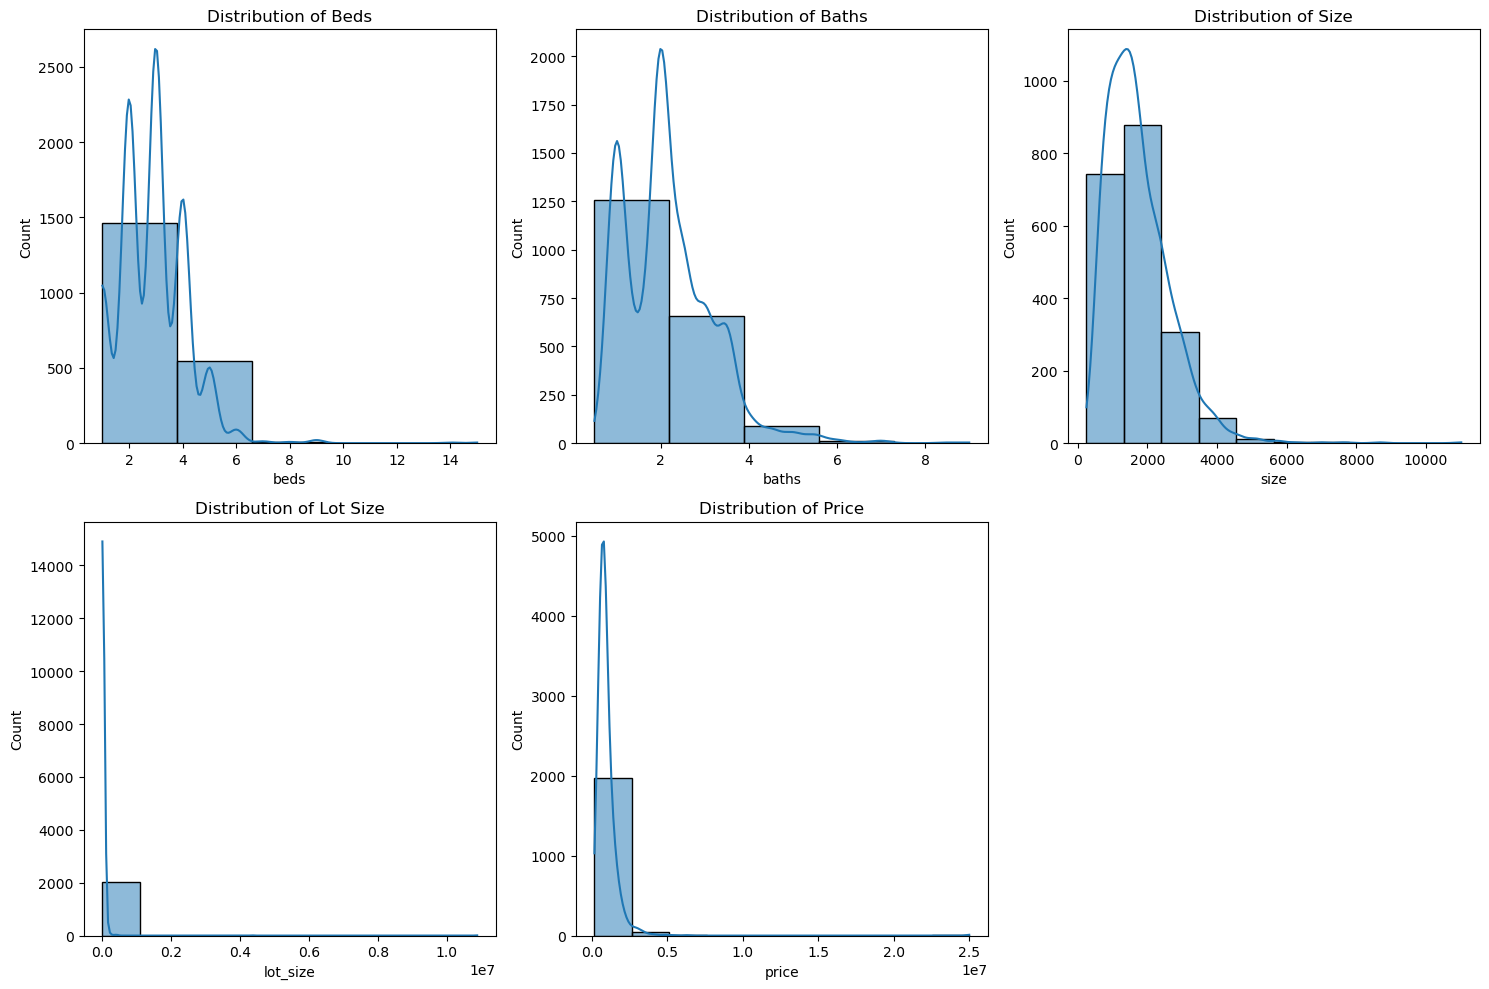

In [27]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(train['beds'], bins=5, kde=True)
plt.title('Distribution of Beds')

plt.subplot(2, 3, 2)
sns.histplot(train['baths'], bins=5, kde=True)
plt.title('Distribution of Baths')

plt.subplot(2, 3, 3)
sns.histplot(train['size'], bins=10, kde=True)
plt.title('Distribution of Size')

plt.subplot(2, 3, 4)
sns.histplot(train['lot_size'], bins=10, kde=True)
plt.title('Distribution of Lot Size')
plt.title('Distribution of Lot Size')

plt.subplot(2, 3, 5)
sns.histplot(train['price'], bins=10, kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

D:\Users\palis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\palis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\palis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\palis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

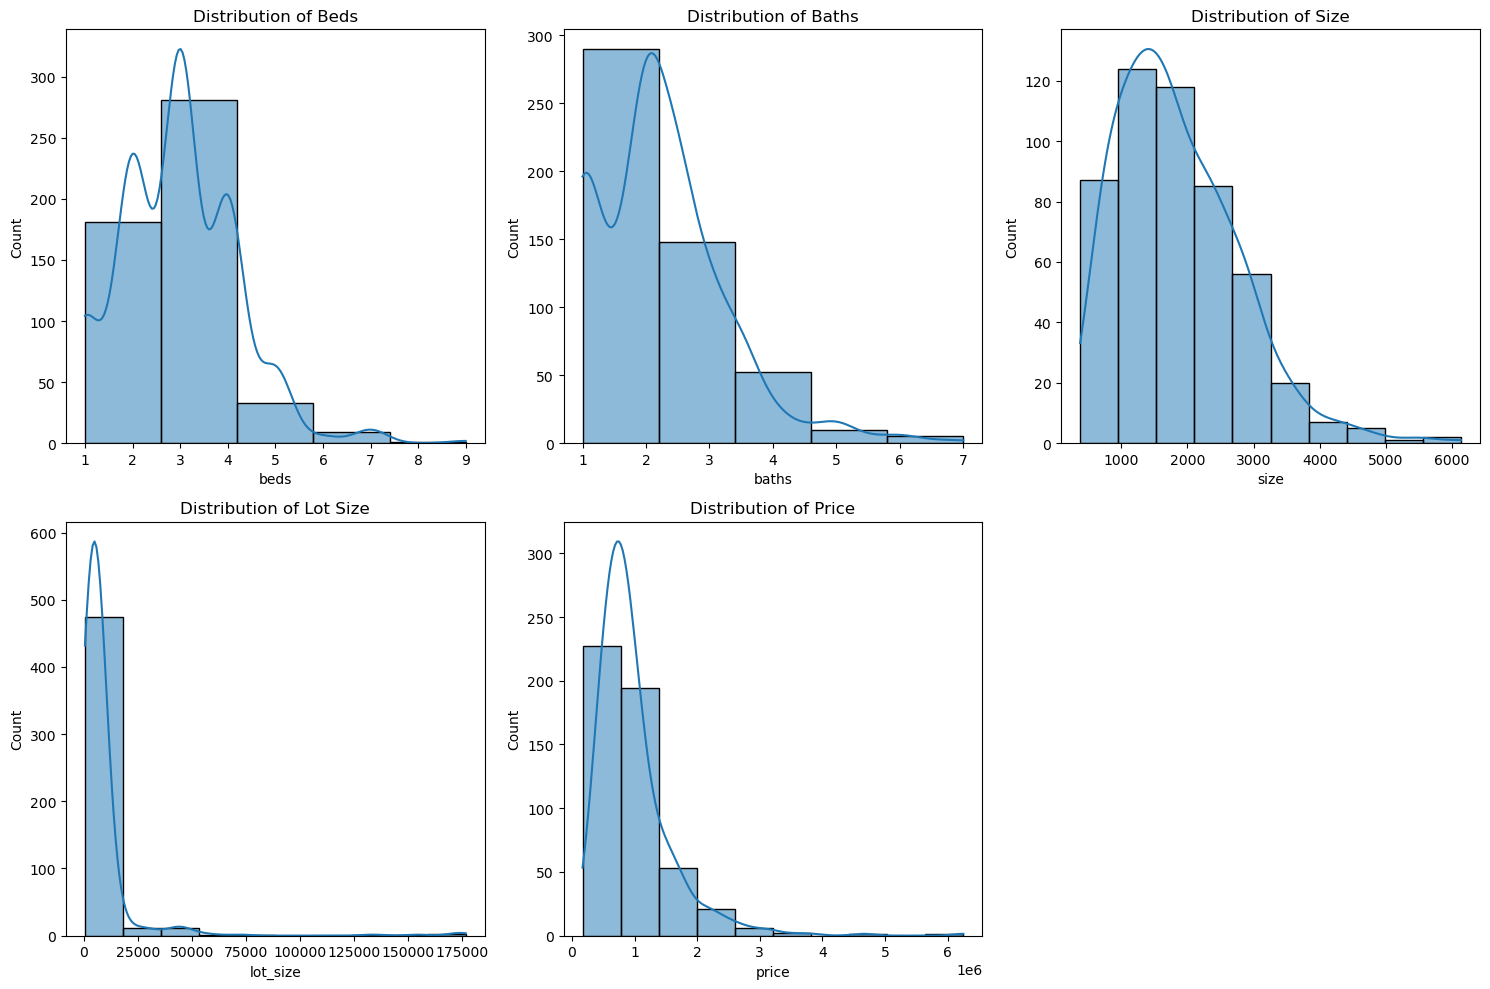

In [28]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(test['beds'], bins=5, kde=True)
plt.title('Distribution of Beds')

plt.subplot(2, 3, 2)
sns.histplot(test['baths'], bins=5, kde=True)
plt.title('Distribution of Baths')

plt.subplot(2, 3, 3)
sns.histplot(test['size'], bins=10, kde=True)
plt.title('Distribution of Size')

plt.subplot(2, 3, 4)
sns.histplot(test['lot_size'], bins=10, kde=True)
plt.title('Distribution of Lot Size')
plt.title('Distribution of Lot Size')

plt.subplot(2, 3, 5)
sns.histplot(test['price'], bins=10, kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

SCATTER PLOT

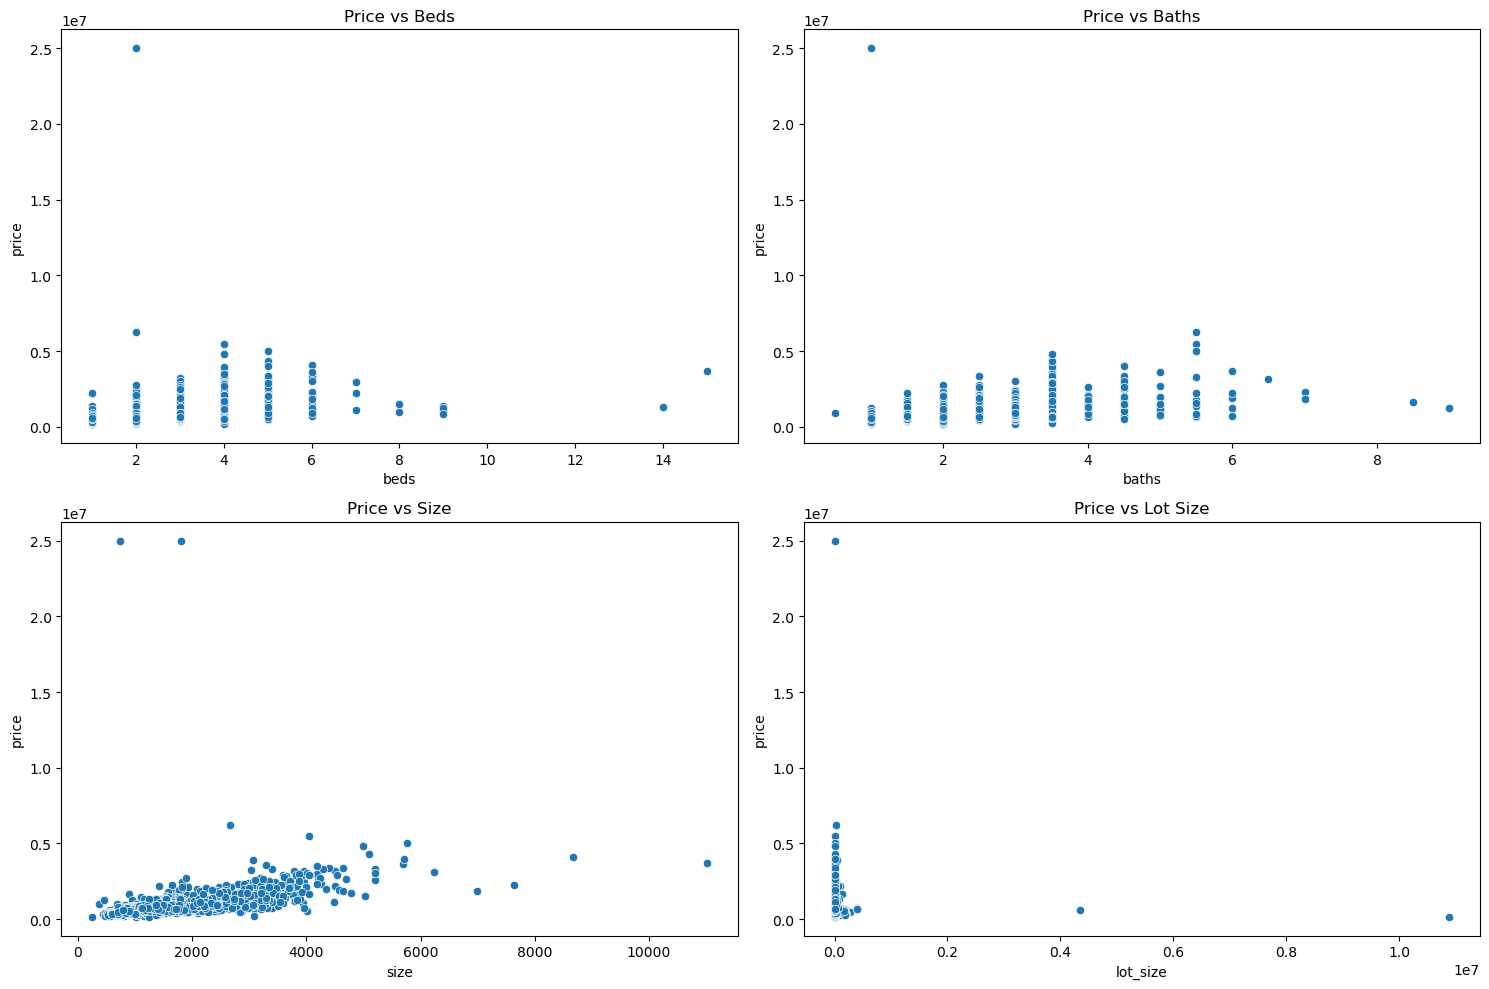

In [30]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='beds', y='price', data=train)
plt.title('Price vs Beds')

plt.subplot(2, 2, 2)
sns.scatterplot(x='baths', y='price', data=train)
plt.title('Price vs Baths')

plt.subplot(2, 2, 3)
sns.scatterplot(x='size', y='price', data=train)
plt.title('Price vs Size')

plt.subplot(2, 2, 4)
sns.scatterplot(x='lot_size', y='price', data=train)
plt.title('Price vs Lot Size')

plt.tight_layout()
plt.show()

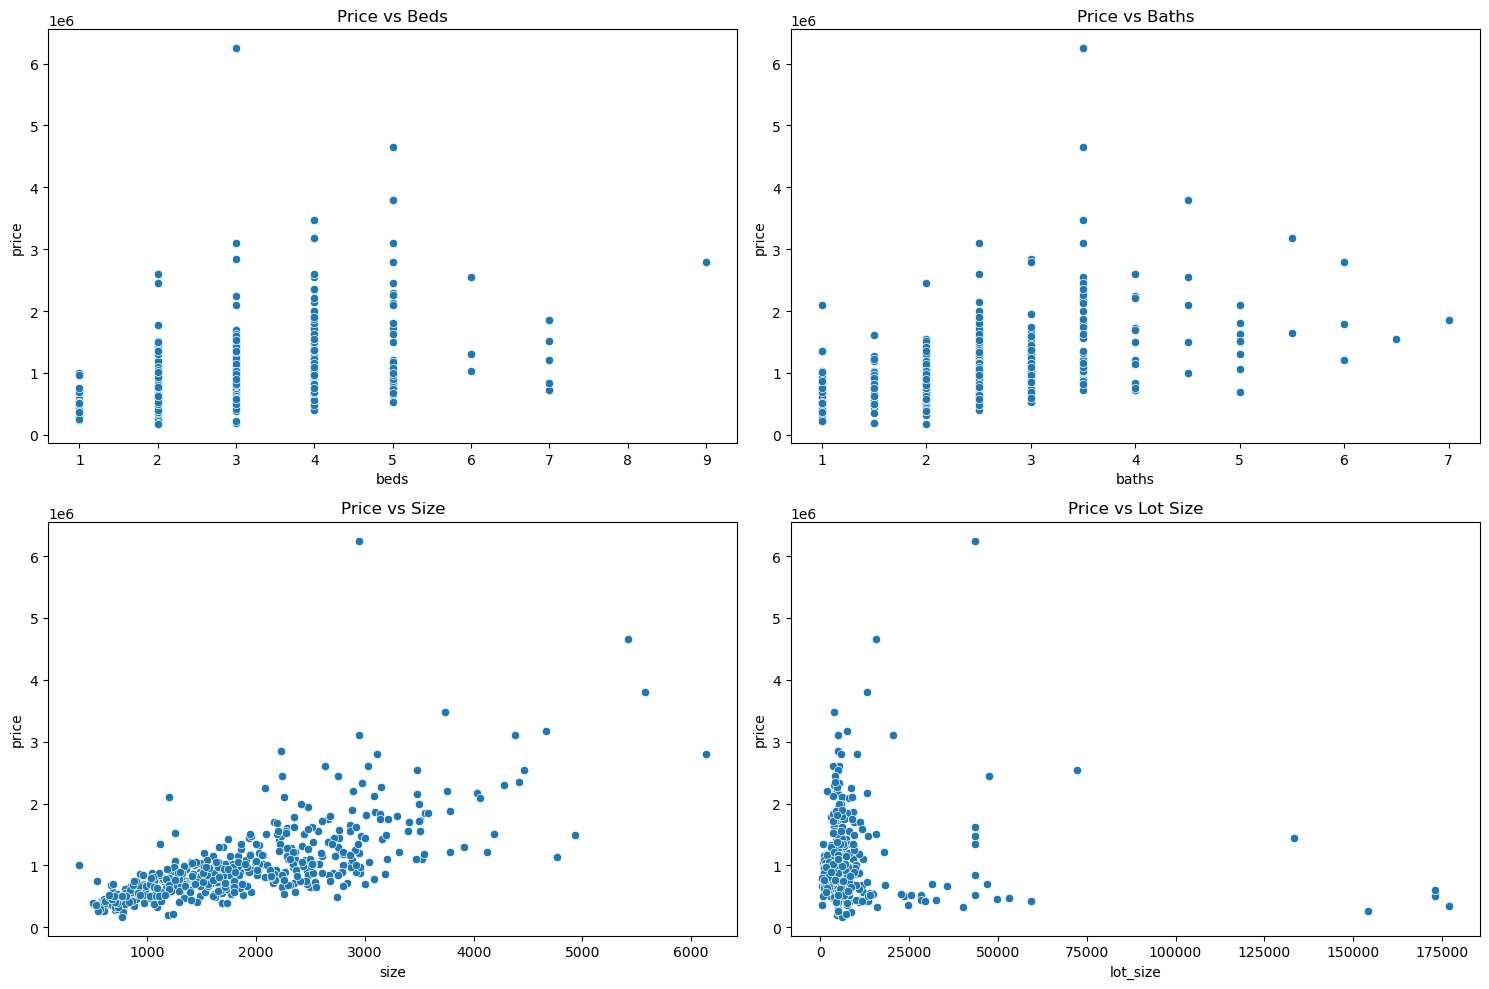

In [31]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='beds', y='price', data=test)
plt.title('Price vs Beds')

plt.subplot(2, 2, 2)
sns.scatterplot(x='baths', y='price', data=test)
plt.title('Price vs Baths')

plt.subplot(2, 2, 3)
sns.scatterplot(x='size', y='price', data=test)
plt.title('Price vs Size')

plt.subplot(2, 2, 4)
sns.scatterplot(x='lot_size', y='price', data=test)
plt.title('Price vs Lot Size')

plt.tight_layout()
plt.show()

In [33]:
train.drop('zip_code', axis = 1, inplace = True)
test.drop('zip_code', axis = 1, inplace = True)
 

In [35]:
X_train = train.drop('price', axis = 1)
X_test = test.drop('price', axis = 1)

In [36]:
y_train = train['price']
y_test = test['price']

LINEAR REGRESSION

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model=LinearRegression()

In [40]:
model.fit(X_train,y_train)

LinearRegression()

In [41]:
model.coef_

array([-1.10897468e+05,  6.97386303e+04,  5.21508511e+02, -1.94045505e-02])

In [42]:
model.intercept_

225011.84669606911

In [44]:
y_pred = model.predict(X_test)

In [45]:
model.score(X_test, y_test)

0.5312326247689407

SUPPORT VECTOR REGRESSION

In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [48]:
svr_model.fit(X_train, y_train)

SVR()

In [49]:
svr_model.score(X_test, y_test)

-0.08727714723974156

RANDOM FOREST REGRESSION

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [52]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
y_pred = rf_model.predict(X_test)

In [54]:
rf_model.score(X_test, y_test)

-0.32458662561593377